# Sistema difuso para la recomendación de un taller

###### En éste ejercicio vamos a evaluar un sistema de taller, tendremos 3 variables que darán un rango de 1-10 y un puntaje máximo de recomendación de 20 puntos que al final será evaluado en porcentaje

In [187]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as lin

In [188]:
# Rangos de 1-10 y la variable recomendación de 0 a 20 (VARIABLES UNIVERSALES)

comp = np.arange(0, 11, 1)
cal = np.arange(0, 11, 1)
reco = np.arange(0, 21, 1)

#Generador de funciones
comp_baj = fuzz.trimf(comp, [0, 0, 10])
comp_med = fuzz.trimf(comp, [0, 5, 10])
comp_alt = fuzz.trimf(comp, [5, 10, 20])
cal_baj = fuzz.trimf(cal, [0, 0, 10])
cal_med = fuzz.trimf(cal, [0, 5, 10])
cal_alt = fuzz.trimf(cal, [5, 10, 20])
reco_baj = fuzz.trimf(reco, [0, 0, 20])
reco_med = fuzz.trimf(reco, [0, 10, 20])
reco_alt = fuzz.trimf(reco, [10, 20, 20])



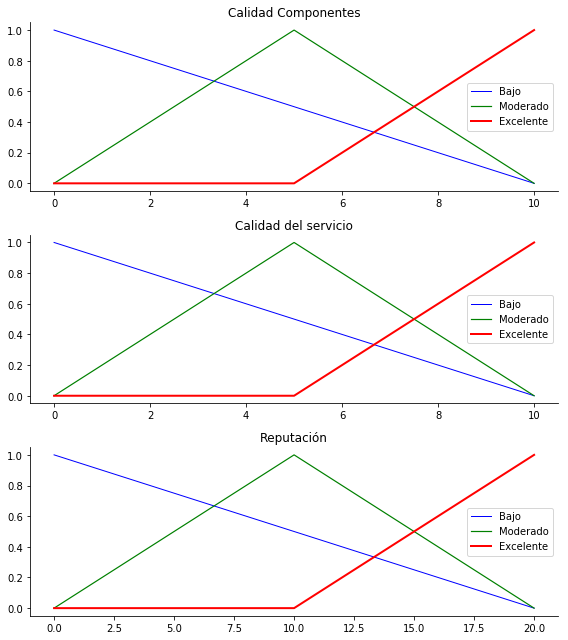

In [189]:
#Visualizador de funciones (.legende para visualizar las gráficas)
#Linewidt según el grado que tenga

fig, (lin0, lin1, lin2) = lin.subplots(nrows=3, figsize=(8, 9))

lin0.plot(comp, comp_baj, 'b', linewidth=1.0, label='Bajo')
lin0.plot(comp, comp_med, 'g', linewidth=1.2, label='Moderado')
lin0.plot(comp, comp_alt, 'r', linewidth=2.0, label='Excelente')
lin0.set_title('Calidad Componentes')
lin0.legend()

lin1.plot(cal, cal_baj, 'b', linewidth=1.0, label='Bajo')
lin1.plot(cal, cal_med, 'g', linewidth=1.2, label='Moderado')
lin1.plot(cal, cal_alt, 'r', linewidth=2.0, label='Excelente')
lin1.set_title('Calidad del servicio')
lin1.legend()

lin2.plot(reco, reco_baj, 'b', linewidth=1.0, label='Bajo')
lin2.plot(reco, reco_med, 'g', linewidth=1.2, label='Moderado')
lin2.plot(reco, reco_alt, 'r', linewidth=2.0, label='Excelente')
lin2.set_title('Reputación')
lin2.legend()

for ax in (lin0, lin1, lin2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

lin.tight_layout()



### Reglas

   * Si los componentes son malos y la calidad es mala entonces la recomendación será baja
   * Si el servicio es aceptable entonces la recomendación será moderada
   * Si los componentes son muy buenos o el servicio es muy bueno entonces la recomendación será alta


* Aplicación de regla 

# ¿Cuál sería el consejo en la siguiente circunstancia?

* La calidad de los componentes 3.8
* El servicio es de 7.8

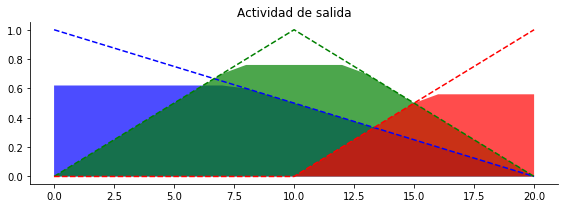

In [223]:
# Activamos las funcioens difusas con los valores indicados 
comp_nivel_baj = fuzz.interp_membership(comp, comp_baj, 3.8)
comp_nivel_med = fuzz.interp_membership(comp, comp_med, 3.8)
comp_nivel_alt = fuzz.interp_membership(comp, comp_alt, 3.8)

cal_nivel_baj = fuzz.interp_membership(cal, cal_baj, 7.8)
cal_nivel_med = fuzz.interp_membership(cal, cal_med, 7.8)
cal_nivel_alt = fuzz.interp_membership(cal, cal_alt, 7.8)


# La regla 1 se refiere a componentes o servicio malo
# Tomamos el máximo de estos dos

activar_regla1 = np.fmax(comp_nivel_baj, cal_nivel_baj)

#Activamos np.fmin

reco_activation_baj = np.fmin(activar_regla1, reco_baj)  

# Para la regla 2, activamos componentes nivel medio con recomendación nivel medio

reco_activation_med = np.fmin(comp_nivel_med, reco_med)

 # Para la regla 3, activamos componentes con nivel alto

activar_regla3 = np.fmax(comp_nivel_alt, cal_nivel_alt)
reco_activation_alt = np.fmin(activar_regla3, reco_alt)

reco0 = np.zeros_like(reco)

#Activamos la visualización

fig, ax0 = lin.subplots(figsize=(8, 3))

ax0.fill_between(reco, reco0, reco_activation_baj, facecolor='b', alpha=0.7)
ax0.plot(reco, reco_baj, 'b', linewidth=1.5, linestyle='--', )
ax0.fill_between(reco, reco0, reco_activation_med, facecolor='g', alpha=0.7)
ax0.plot(reco, reco_med, 'g', linewidth=1.5, linestyle='--')
ax0.fill_between(reco, reco0, reco_activation_alt, facecolor='r', alpha=0.7)
ax0.plot(reco, reco_alt, 'r', linewidth=1.5, linestyle='--')
ax0.set_title('Actividad de salida')


#Desactivamos ejes superior/derecho
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

lin.tight_layout()

# Usamos método centroide para obtener una respuesta real

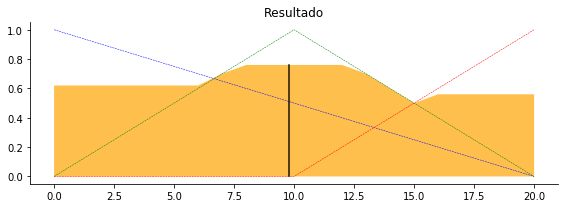

In [224]:
# Agruprando las funciones de salida 
aggregated = np.fmax(reco_activation_baj,
                     np.fmax(reco_activation_med, reco_activation_alt))

#Calculamos el resultado con el método centroide
reconu = fuzz.defuzz(reco, aggregated, 'centroid')
reco_activation = fuzz.interp_membership(reco, aggregated, reconu)  # for plot


#Activamos la visualización de gráfica pintándola  
fig, ax0 = lin.subplots(figsize=(8, 3))

ax0.plot(reco, reco_baj, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(reco, reco_med, 'g', linewidth=0.5, linestyle='--')
ax0.plot(reco, reco_alt, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(reco, reco0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([reconu, reconu], [0, reco_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Resultado')

#Desactivamos los ejes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

lin.tight_layout()
ax.get_yaxis().tick_left()

lin.tight_layout()



# La recomendación del taller nos da un resultado de 9.8%